# Podstawy Przetwarzania Dużych Zbiorów Danych

Grupa IBD4 Poniedziałki 8:30

Łukasz Moskwa 247739

Artur Szewczykowski 252546


### 0.0 Importy i wczytanie do df


In [30]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

df_data = pd.read_csv("../wyniki/final_data.csv")
df_data['date'] = pd.to_datetime(df_data['date'])
df_data = df_data.sort_values('date')
df_europe = df_data[df_data['Continent'] == 'Europe'].copy()
df_europe

,Unnamed: 0,Country_name,3_letter_code,Urban Population,gdp_per_capita_usd,GDP_2022,date,Total_confirmed_cases,Total_new_deceased,Total_new_vaccinations,...,Murders_Rate_2015,Murders_Rate_2016,Murders_Rate_2017,Murders_Rate_2018,Murders_Rate_2019,Murders_Rate_2020,Murders_Rate_2021,Total_cases,Total_deceased,Total_vaccinations
15166,5092,Latvia,LVA,1304943.0,17818.0,3.420999e+10,2020-12-07,712,5,1.0,...,3.363531,3.496369,4.143514,4.339671,3.391501,3.689936,3.041754,712,5,1.0
20496,29331,Norway,NOR,4418218.0,75419.0,4.018484e+11,2020-12-08,392,2,5.0,...,0.462396,0.515603,0.530565,0.470604,0.523533,0.576225,0.536737,392,2,5.0
15167,5093,Latvia,LVA,1304943.0,17818.0,3.420999e+10,2020-12-09,680,15,1.0,...,3.363531,3.496369,4.143514,4.339671,3.391501,3.689936,3.041754,1392,20,2.0
20497,29332,Norway,NOR,4418218.0,75419.0,4.018484e+11,2020-12-09,453,0,1.0,...,0.462396,0.515603,0.530565,0.470604,0.523533,0.576225,0.536737,845,2,6.0
20498,29333,Norway,NOR,4418218.0,75419.0,4.018484e+11,2020-12-10,435,21,1.0,...,0.462396,0.515603,0.530565,0.470604,0.523533,0.576225,0.536737,1280,23,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,18158,Italy,ITA,42651966.0,34456.0,2.079749e+12,2022-09-13,23161,93,306.0,...,0.778644,0.672005,0.626625,0.599558,0.530740,0.478987,0.511476,19735753,104708,48863177.0
7433,22876,Czech Republic,CZE,7887156.0,23010.0,2.450519e+11,2022-09-13,3020,5,84.0,...,0.836200,0.617425,0.626703,NaN,0.920577,0.731178,0.447161,3394685,29563,6973663.0
2349,14142,Austria,AUT,5194416.0,51448.0,4.557663e+11,2022-09-13,6177,1,98.0,...,0.509117,0.618097,0.795681,0.972794,0.867123,0.729699,0.728530,4652125,13356,6789434.0
7434,22877,Czech Republic,CZE,7887156.0,23010.0,2.450519e+11,2022-09-14,2625,2,64.0,...,0.836200,0.617425,0.626703,NaN,0.920577,0.731178,0.447161,3397310,29565,6973727.0


### Część 1 - Analiza danych

<b> 1.1. Obliczenia </b>

In [33]:
kolumny = {
    'Nowe_zachorowania': 'Total_confirmed_cases',
    'Nowe_zgony': 'Total_new_deceased',
    'Nowe_szczepienia': 'Total_new_vaccinations',
    'Nowe_pełne_szczepienia': 'New_persons_fully_vaccinated',
    'Nowe_testy': 'Total_tested'
}

# 7-dniowe średnie i odchylenia
for nazwa, kolumna in [('Nowe_zachorowania', 'Total_confirmed_cases'),
                       ('Nowe_zgony', 'Total_new_deceased'),
                       ('Nowe_szczepienia', 'Total_new_vaccinations'),
                       ('Nowe_pełne_szczepienia', 'New_persons_fully_vaccinated'),
                       ('Nowe_testy', 'Total_tested')]:

    df_europe[f'{nazwa}_srednia_7dni'] = df_europe[kolumna].rolling(window=7).mean()
    df_europe[f'{nazwa}_odchylenie_7dni'] =df_europe[kolumna].rolling(window=7).std()
df_europe

,Unnamed: 0,Country_name,3_letter_code,Urban Population,gdp_per_capita_usd,GDP_2022,date,Total_confirmed_cases,Total_new_deceased,Total_new_vaccinations,...,Nowe_zachorowania_srednia_7dni,Nowe_zachorowania_odchylenie_7dni,Nowe_zgony_srednia_7dni,Nowe_zgony_odchylenie_7dni,Nowe_szczepienia_srednia_7dni,Nowe_szczepienia_odchylenie_7dni,Nowe_pełne_szczepienia_srednia_7dni,Nowe_pełne_szczepienia_odchylenie_7dni,Nowe_testy_srednia_7dni,Nowe_testy_odchylenie_7dni
15166,5092,Latvia,LVA,1304943.0,17818.0,3.420999e+10,2020-12-07,712,5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20496,29331,Norway,NOR,4418218.0,75419.0,4.018484e+11,2020-12-08,392,2,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15167,5093,Latvia,LVA,1304943.0,17818.0,3.420999e+10,2020-12-09,680,15,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20497,29332,Norway,NOR,4418218.0,75419.0,4.018484e+11,2020-12-09,453,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20498,29333,Norway,NOR,4418218.0,75419.0,4.018484e+11,2020-12-10,435,21,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,18158,Italy,ITA,42651966.0,34456.0,2.079749e+12,2022-09-13,23161,93,306.0,...,6145.571429,7967.950633,22.142857,34.377457,149.000000,142.956872,95.428571,100.667533,44467.428571,65185.813121
7433,22876,Czech Republic,CZE,7887156.0,23010.0,2.450519e+11,2022-09-13,3020,5,84.0,...,5660.571429,8051.702239,18.142857,34.532249,121.142857,131.980339,72.428571,76.923895,37189.714286,66319.778527
2349,14142,Austria,AUT,5194416.0,51448.0,4.557663e+11,2022-09-13,6177,1,98.0,...,6510.571429,7688.356497,18.285714,34.446646,129.428571,127.791312,65.857143,81.392932,51997.571429,68588.134540
7434,22877,Czech Republic,CZE,7887156.0,23010.0,2.450519e+11,2022-09-14,2625,2,64.0,...,6150.857143,7820.769430,18.428571,34.364988,129.142857,127.958887,77.714286,76.071707,47129.142857,70731.238187


<b> 1.2. Wykresy średniej 7-dniowej.</b>

<Figure size 1400x800 with 0 Axes>

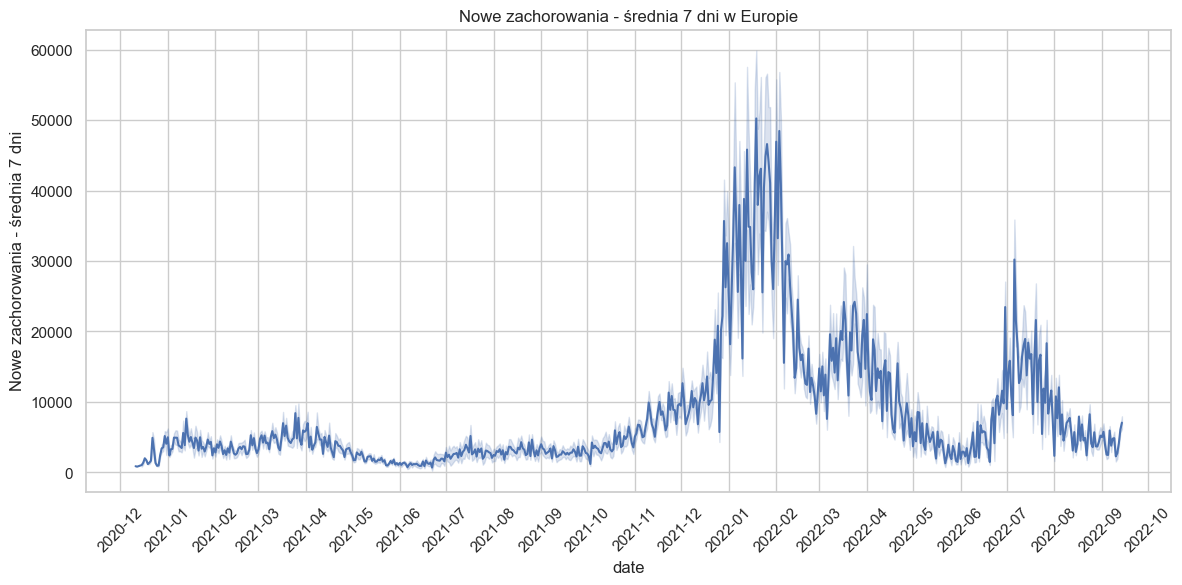

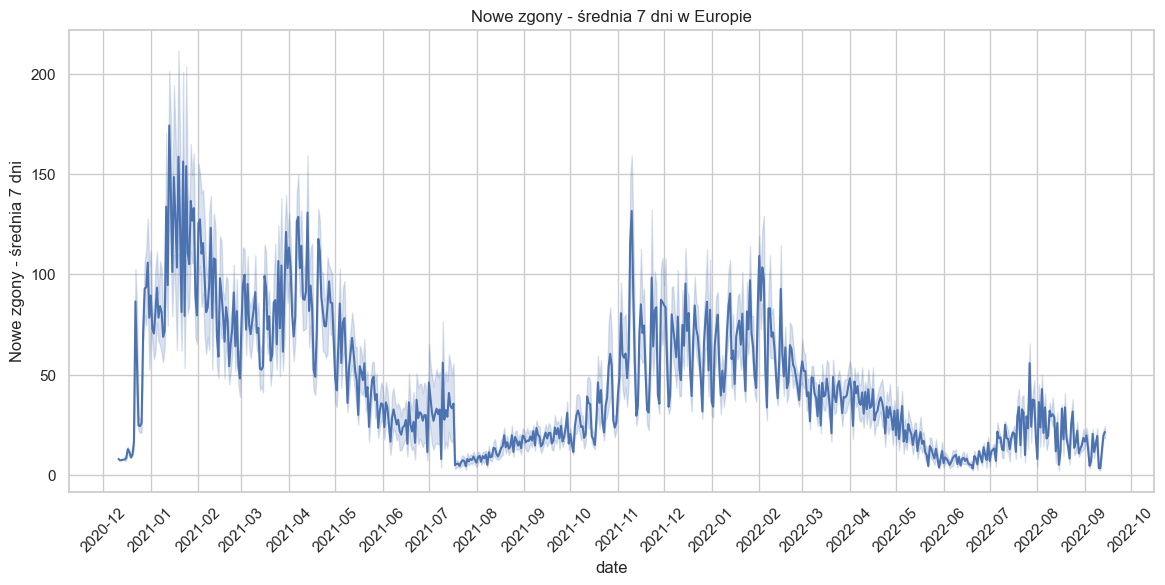

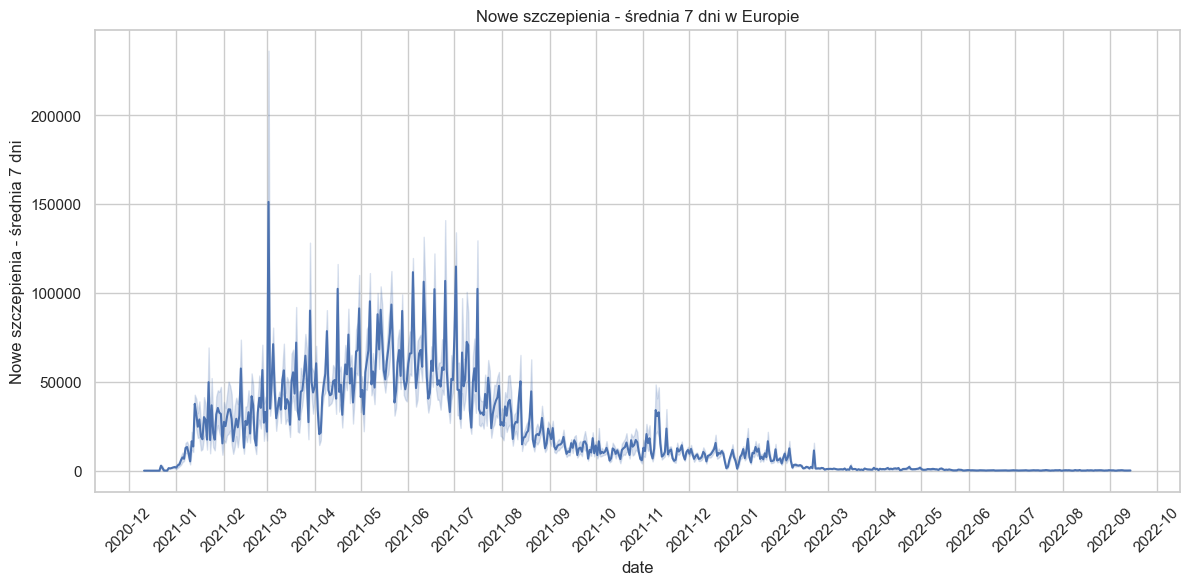

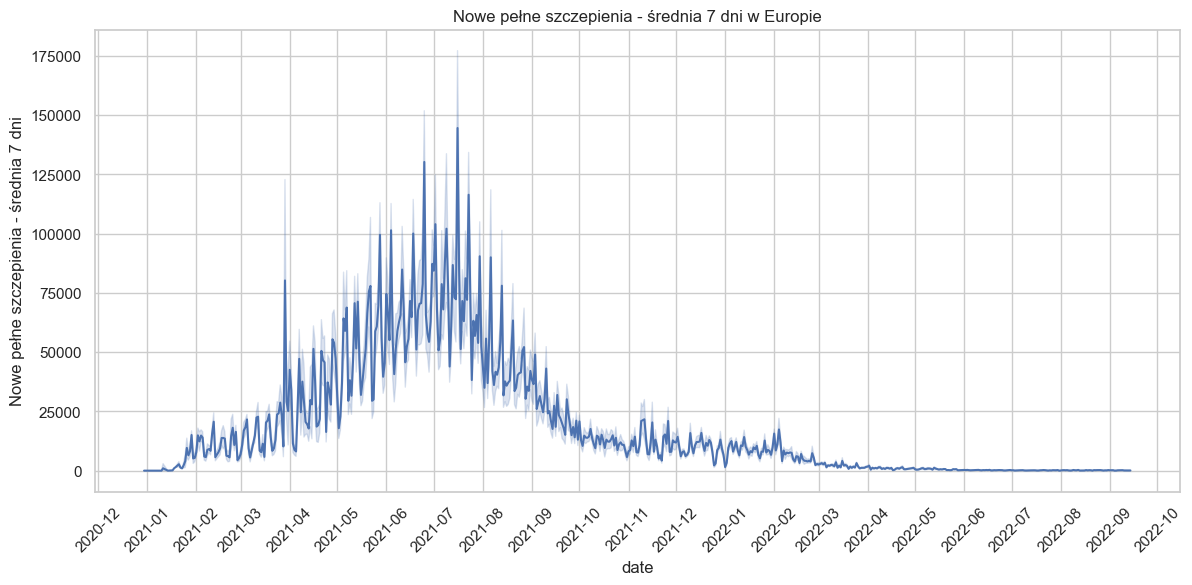

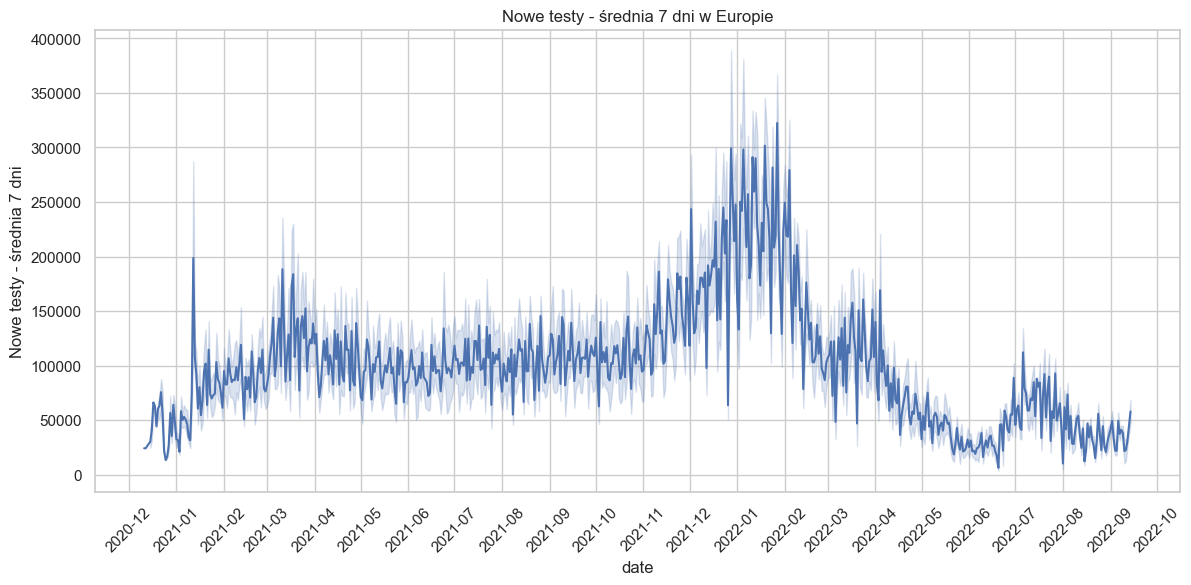

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Lista zmiennych do rysowania
zmienne = [
    ('Nowe_zachorowania_srednia_7dni', 'Nowe zachorowania - średnia 7 dni'),
    ('Nowe_zgony_srednia_7dni', 'Nowe zgony - średnia 7 dni'),
    ('Nowe_szczepienia_srednia_7dni', 'Nowe szczepienia - średnia 7 dni'),
    ('Nowe_pełne_szczepienia_srednia_7dni', 'Nowe pełne szczepienia - średnia 7 dni'),
    ('Nowe_testy_srednia_7dni', 'Nowe testy - średnia 7 dni')
]

# Rysujemy każdy wykres osobno
for kolumna, tytul in zmienne:
    plt.figure(figsize=(14,6))
    sns.lineplot(x='date', y=kolumna, data=df_europe)
    plt.title(f'{tytul} w Europie')
    plt.ylabel(tytul)
    plt.xticks(rotation=30)
    plt.grid(True)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.show()

Wnioski:

- Zachorowania - widać duży wzrost od listopada 2021 do lutego 2022 i potem jeszcze dwie mniejsze fale.
- Śmierci - widać 5 głównych momentów wzrostu, z czego 2 pierwsze bardzo duże i wcale niezwiązane ze wzrostem liczby zachorowań, zmotywował on za to ludzi do szczepień, przez co przy kolejnej fali dużej ilości zachorowań i śmierci nie musieli się oni aż tak szczepić. Jest też ciekawy spadek w wakacje 2021.
- Nowe szczepienia - luty-lpiec 2021 to był czas największych szczepień.
- Nowe pełne szczepienia - bardzo ładnie widać przesunięcie trendu w czasie względem zwykłych szczepień.
- Nowe testy - wyglądaja jak nałożenie na siebie wykresów zachorowań i śmierci.
Wnioski ogólne:
- dla wszystkich danych widać bardzo duży szum, który utrudnia analizę, chociaż szczepienia i pełne szczepienia mają mniejsze wahania pomiędzy wartościami średnich w danym miesiącu.
- szczepinia i pełne szczepienia nie miały też wybrzuszenia w końcowym okresie jak pozostałe parametry (lipiec/sierpień 2022).
- dla każdego typu wartości po okresach szczytowych następuje spadek.

<b> 1.3. Wykresy 7-dniowego odchylenie standardowego z naniesioną średnią. </b>

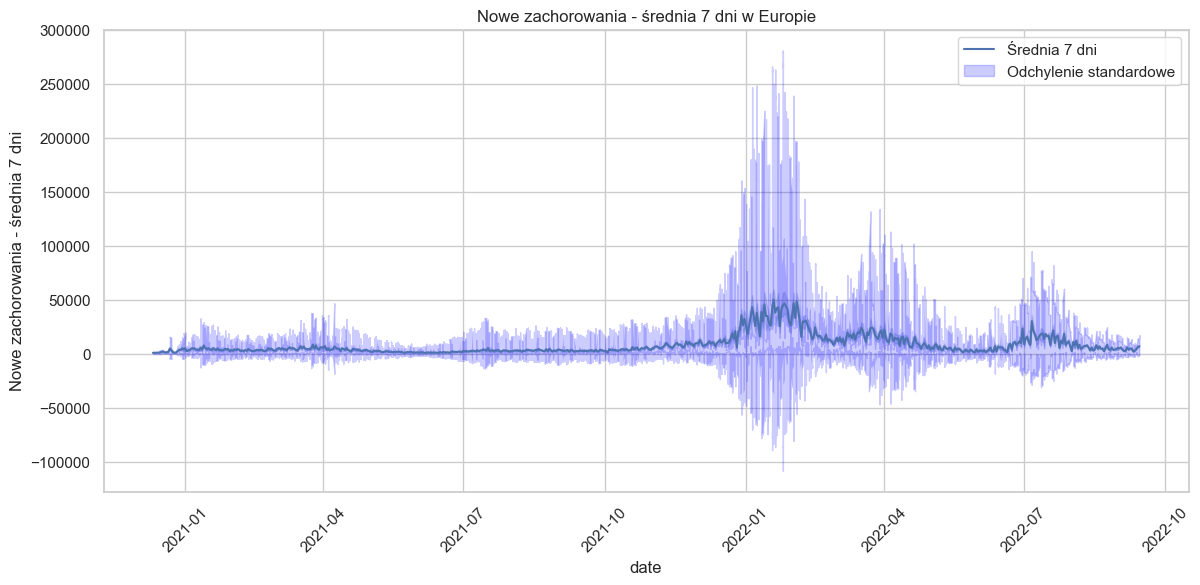

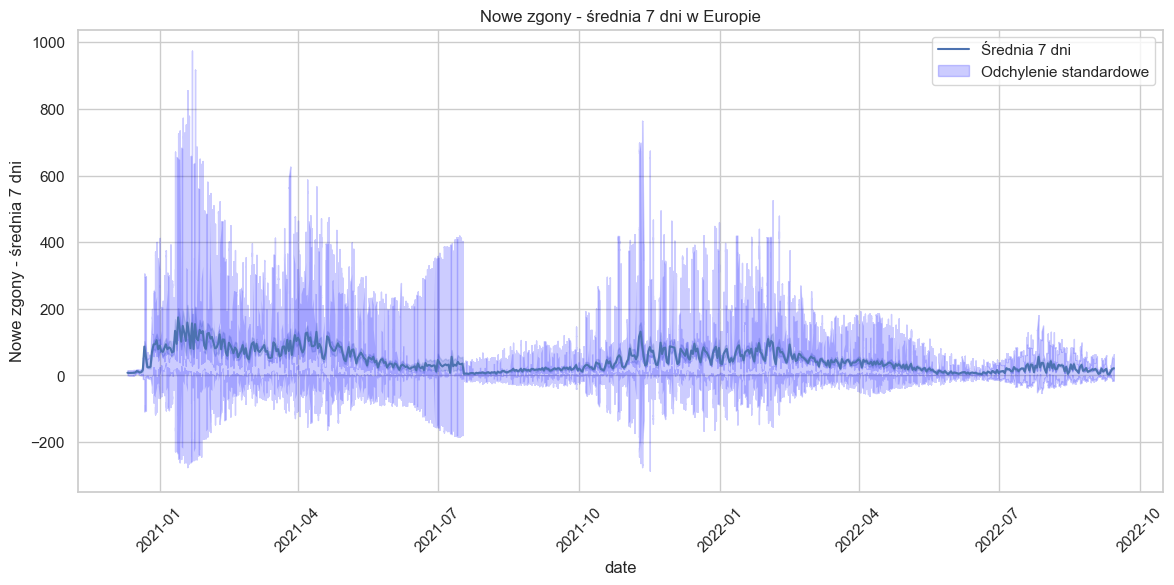

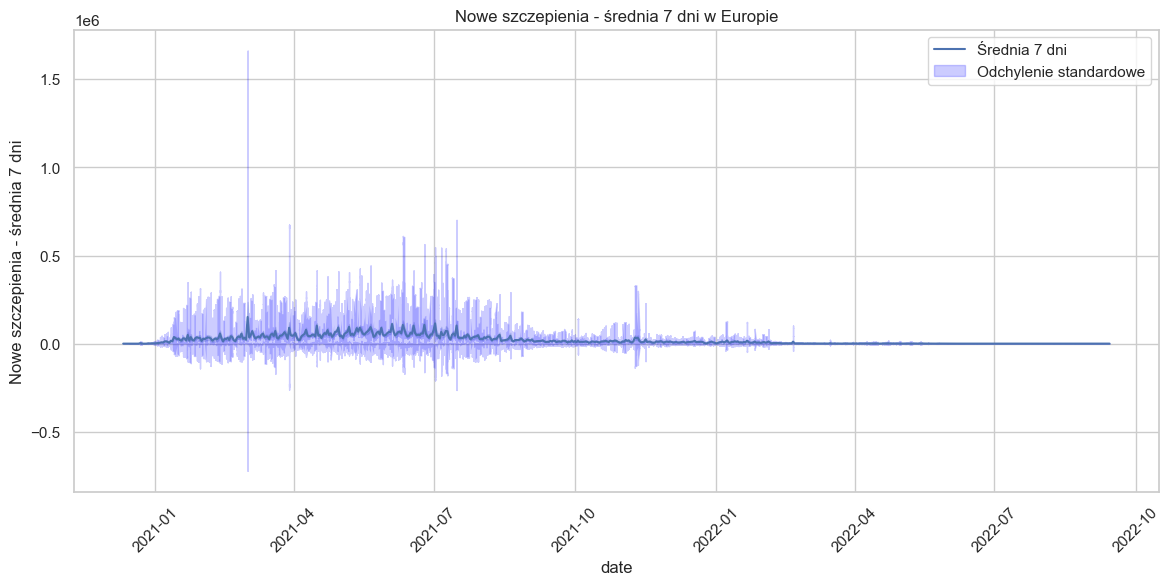

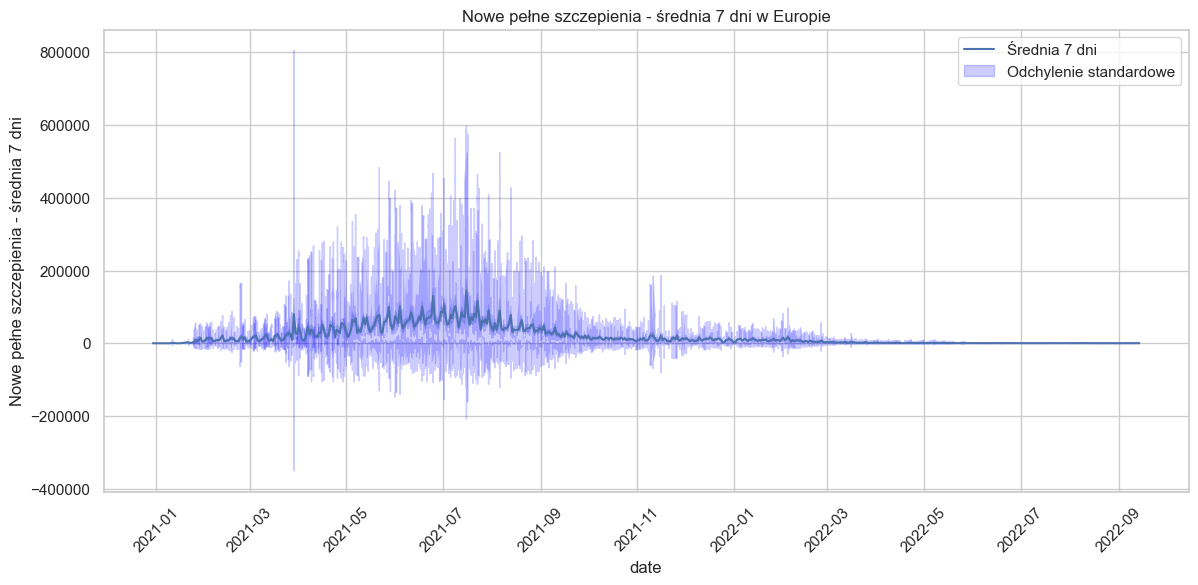

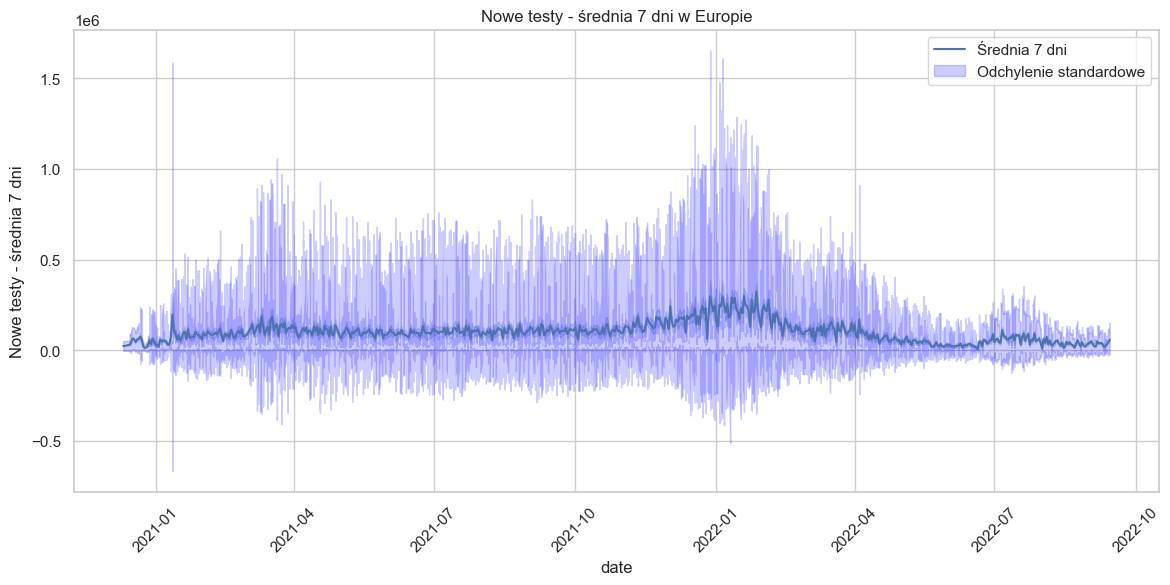

In [13]:
sns.set(style="whitegrid")

for bazowa_nazwa, tytul in zmienne:
    srednia_kolumna = f'{bazowa_nazwa}_srednia_7dni'
    odchylenie_kolumna = f'{bazowa_nazwa}_odchylenie_7dni'

    plt.figure(figsize=(14,6))

    # Wykres średniej
    sns.lineplot(x='date', y=srednia_kolumna, data=df_europe, label='Średnia 7 dni')

    # Wstęga - obszar średnia +/- odchylenie
    plt.fill_between(
        df_europe['date'],
        df_europe[srednia_kolumna] - df_europe[odchylenie_kolumna],
        df_europe[srednia_kolumna] + df_europe[odchylenie_kolumna],
        color='blue',
        alpha=0.2,
        label='Odchylenie 7 dni'
    )

    plt.title(f'{tytul} + odchylenie standardowe w Europie')
    plt.ylabel(tytul)
    plt.xticks(rotation=30)
    plt.legend()
    plt.grid(True)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.show()


Wnioski:

Odchylenie standardowe z danego tygodnia w każdym przypadku przyjmuje trend podobny do średniej wartości. Jest jednak kilka ciekawych wątków:
- w każdym przypadku wartości powyżej średniej są większe od tych poniżej - czyli częściej zdarzała się sytuacja, w której jakiś/-eś kraje miały dużo więcej danych przypadków od średniej niż dużo mniej.
- dla każdego rodzaju statystyk, ale szczególnie widać to przy szczepieniach i testach znajdziemy wyniki, które w danym momencie ekstramalnie odstają od średniej - być może to błąd a być może społeczeńśtwo w jakimś kraju w danym okresie bardzo masowo się szczepiło czy testowało.
- nagły spadek liczby zgonów w wakacje 2021 dla odchylenia standardowego jest jeszcze mocniejszy niż dla średniej.
- najmniejsze zróżnicowanie w zmianach wartości odchylenia jest dla liczby testów, co nie rzucało się tak w oczy przy średniej.

### Część 2 - szeregi czasowe

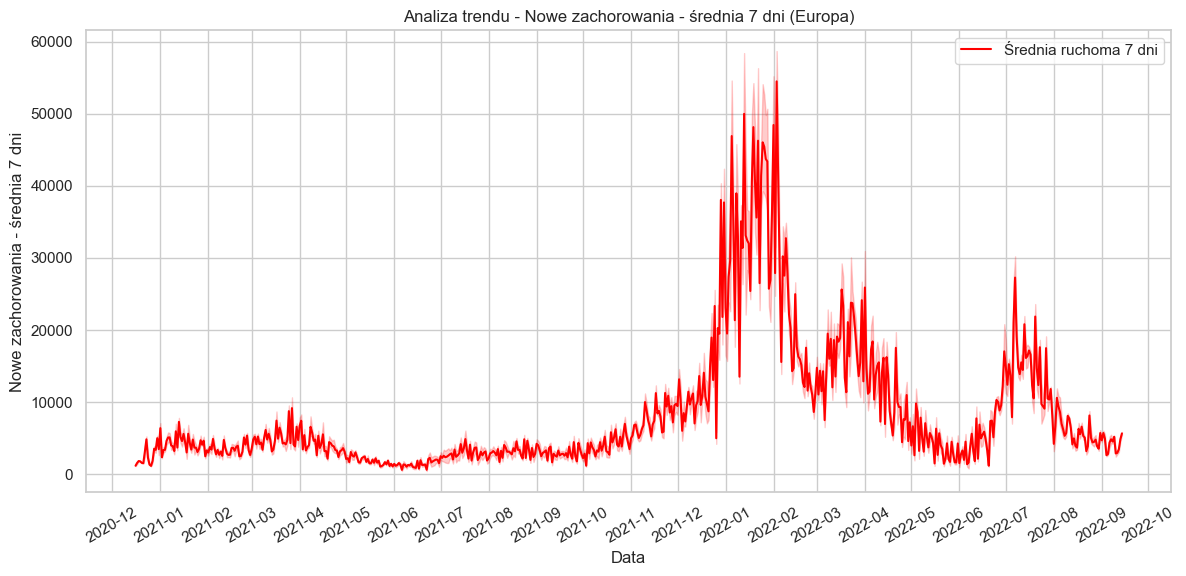

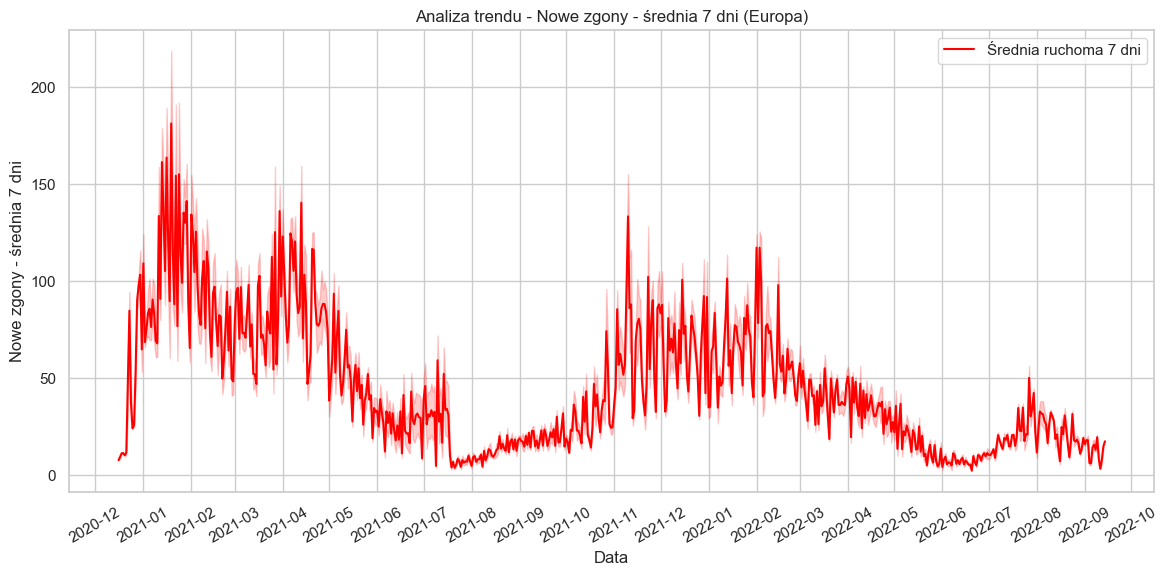

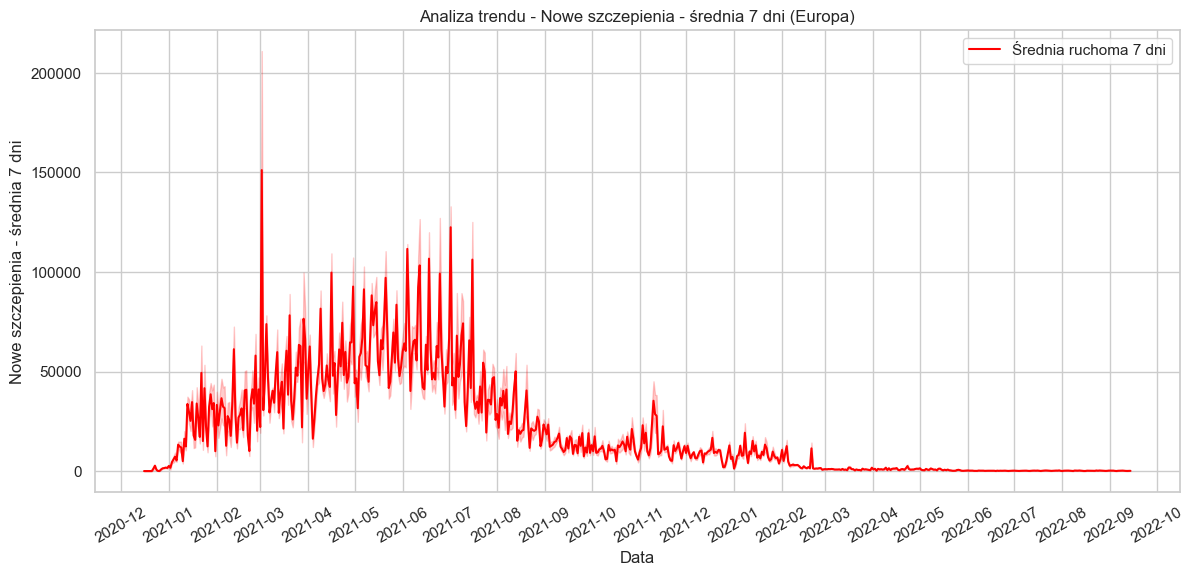

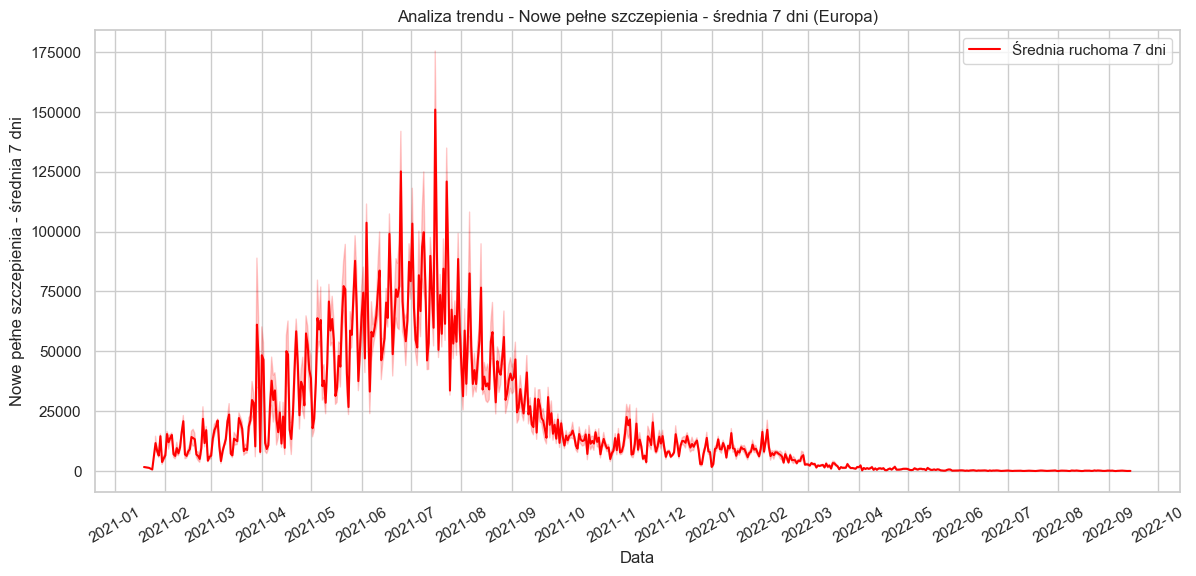

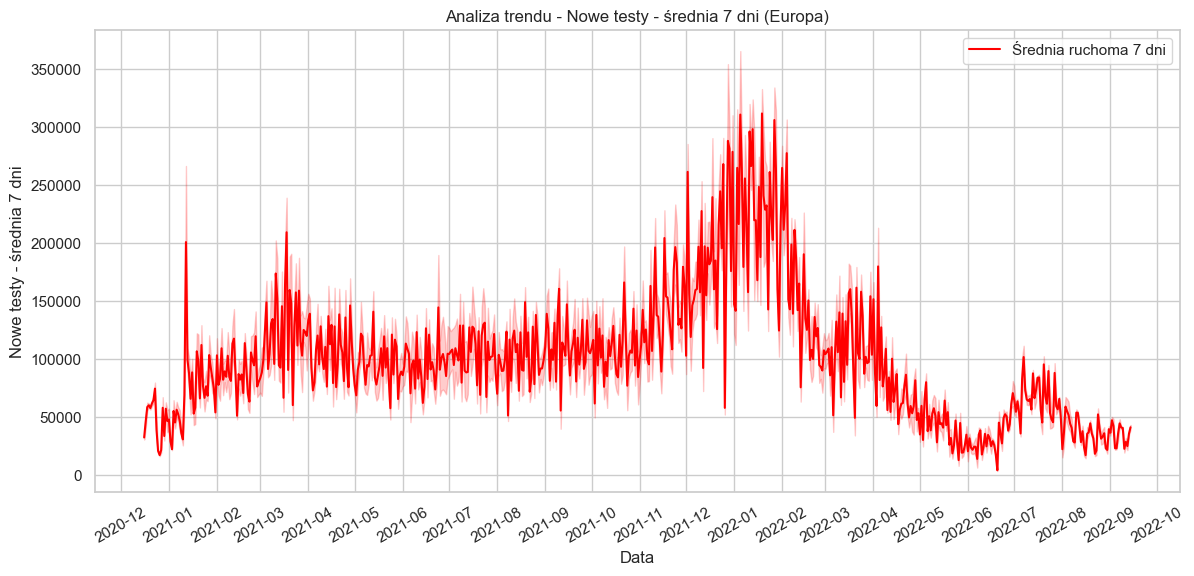

In [26]:
sns.set(style="whitegrid")

for bazowa_nazwa, tytul in zmienne:
    plt.figure(figsize=(14,6))

    # Średnia ruchoma
    df_europe[f'{bazowa_nazwa}_MA30'] = df_europe[bazowa_nazwa].rolling(window=7).mean()
    sns.lineplot(x='date', y=f'{bazowa_nazwa}_MA30', data=df_europe, label='Średnia ruchoma 7 dni', color='blue')

    # Opis
    plt.title(f'Analiza trendu - {tytul} (Europa)')
    plt.xlabel('Data')
    plt.ylabel(tytul)
    plt.xticks(rotation=30)
    plt.legend()
    plt.grid(True)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.show()


no i co no i jajco

a tak na serio to chyba chodzi o to, że jest mniej szumu ale trzeba jeszcze o tym doczytać.

### Część 3 - analiza regresji

### Część 4 - regresja wielomianowa

### Część 5 - regresja liniowa 2 państw